#### 외국어 판정
: 알파벳을 사용하는 자연언어가 어떤 나라의 말인지 판명 

#### 판정 방법
- 언어가 다르면 알파벳의 출현빈도가 다르다. (언어학적으로 알려진 사실을 활용)
- 언어마다 자주 사용하는 표현과 단어가 다르기 때문에 출현빈도가 달라진다.   
- a~z까지의 출현빈도를 확인하고 이를 특징으로 활용한다. 

#### 샘플데이터 수집
- 위키피디아 글자를 사용
- 영어(en), 프랑스어(fr), 인도네시아(id), 타갈로그어(tl)로 구분
- train data는 20개(영어:5개, 프랑스어:5개, 인도네시아어:5개, 타갈로그어:5개)의 파일 
- test data는 8개(각 2개씩)의 파일 

In [1]:
from sklearn import svm, metrics
import glob # 여러개의 file 이름을 합치기 
import os # 운영체제 명령어 
import re # 정규식 처리 
import json # json 

----
#### Train Data 처리


In [2]:
file_list = glob.glob("../Data/lang/train/*.txt")
file_list

['../Data/lang/train\\en-1.txt',
 '../Data/lang/train\\en-2.txt',
 '../Data/lang/train\\en-3.txt',
 '../Data/lang/train\\en-4.txt',
 '../Data/lang/train\\en-5.txt',
 '../Data/lang/train\\fr-10.txt',
 '../Data/lang/train\\fr-6.txt',
 '../Data/lang/train\\fr-7.txt',
 '../Data/lang/train\\fr-8.txt',
 '../Data/lang/train\\fr-9.txt',
 '../Data/lang/train\\id-11.txt',
 '../Data/lang/train\\id-12.txt',
 '../Data/lang/train\\id-13.txt',
 '../Data/lang/train\\id-14.txt',
 '../Data/lang/train\\id-15.txt',
 '../Data/lang/train\\tl-16.txt',
 '../Data/lang/train\\tl-17.txt',
 '../Data/lang/train\\tl-18.txt',
 '../Data/lang/train\\tl-19.txt',
 '../Data/lang/train\\tl-20.txt']

In [3]:
freqs = []
labels = []

for fname in file_list:
    name = os.path.basename(fname) # 전체 경로중 file name만 추출 
    lang = re.match(r'^[a-z]{2,}', name).group() # file name중 앞의 2글자만 추출
    with open(fname, "r", encoding='utf-8') as f:
        text = f.read()
    text = text.lower() # 소문자 변환 
    
    # 숫자 세기 변수 초기화 하기
    cnt = [0 for i in range(26)] # 알파벳 갯수 26개를 0으로 초기화 
    
    # ASCII Code로 변환후 범위 설정
    code_a = ord("a")
    code_z = ord("z")

    # 알파벳 출현 횟수 구하기
    for ch in text:
        n = ord(ch)
        if code_a <= n <= code_z: # a~z사이에 있는 경우만 
            cnt[n - code_a]+=1
    
    # 정규화 하기
    total = sum(cnt)
    freq = [cnt[i] / total for i in range(len(cnt))]
    freqs.append(freq)
    labels.append(lang)

In [4]:
freqs[1]

[0.08417789436031954,
 0.019911768212710148,
 0.030404196971503518,
 0.038869679265529984,
 0.13699773458924527,
 0.017407893167998092,
 0.031238821986407535,
 0.02742339334684631,
 0.07535471563133421,
 0.0026231071896983425,
 0.009777035888875641,
 0.042327411470132345,
 0.024204125432216526,
 0.05353523309884345,
 0.06879694765708835,
 0.020269464647669013,
 0.005484678669369262,
 0.09013950160963395,
 0.07165851913675927,
 0.07773935853105997,
 0.030642661261476092,
 0.013711696673423155,
 0.013950160963395731,
 0.002026946464766901,
 0.010730893048765948,
 0.0005961607249314415]

In [5]:
len(freqs[0])

26

In [6]:
labels[1]

'en'

In [7]:
data = {'freqs':freqs, 'labels':labels}
data

{'freqs': [[0.07595212187159957,
   0.012840043525571273,
   0.04570184983677911,
   0.04613710554951034,
   0.10533188248095757,
   0.015669205658324265,
   0.019151251360174103,
   0.043743199129488576,
   0.07399347116430903,
   0.0017410228509249185,
   0.00544069640914037,
   0.05375408052230685,
   0.026332970620239392,
   0.07747551686615888,
   0.08966267682263329,
   0.016539717083786723,
   0.0,
   0.07769314472252448,
   0.061371055495103376,
   0.08052230685527748,
   0.02589771490750816,
   0.009793253536452665,
   0.014145810663764961,
   0.0006528835690968443,
   0.02002176278563656,
   0.0004352557127312296],
  [0.08417789436031954,
   0.019911768212710148,
   0.030404196971503518,
   0.038869679265529984,
   0.13699773458924527,
   0.017407893167998092,
   0.031238821986407535,
   0.02742339334684631,
   0.07535471563133421,
   0.0026231071896983425,
   0.009777035888875641,
   0.042327411470132345,
   0.024204125432216526,
   0.05353523309884345,
   0.0687969476570883

---
#### Test Data 처리

In [8]:
file_list = glob.glob("../Data/lang/test/*.txt")
file_list

['../Data/lang/test\\en-1.txt',
 '../Data/lang/test\\en-2.txt',
 '../Data/lang/test\\fr-3.txt',
 '../Data/lang/test\\fr-4.txt',
 '../Data/lang/test\\id-5.txt',
 '../Data/lang/test\\id-6.txt',
 '../Data/lang/test\\tl-7.txt',
 '../Data/lang/test\\tl-8.txt']

In [9]:
freqs = []
labels = []

for fname in file_list:
    name = os.path.basename(fname) # 전체 경로중 file name만 추출 
    lang = re.match(r'^[a-z]{2,}', name).group() # file name중 앞의 2글자만 추출
    with open(fname, "r", encoding='utf-8') as f:
        text = f.read()
    text = text.lower() # 소문자 변환 
    
    # 숫자 세기 변수 초기화 하기
    cnt = [0 for i in range(26)] # 알파벳 갯수 26개를 0으로 초기화 
    
    # ASCII Code로 변환후 범위 설정
    code_a = ord("a")
    code_z = ord("z")

    # 알파벳 출현 횟수 구하기
    for ch in text:
        n = ord(ch)
        if code_a <= n <= code_z: # a~z사이에 있는 경우만 
            cnt[n - code_a]+=1
    
    # 정규화 하기
    total = sum(cnt)
    freq = [cnt[i] / total for i in range(len(cnt))]
    freqs.append(freq)
    labels.append(lang)

In [10]:
test = {'freqs' : freqs, 'labels':labels}

In [11]:
test['labels'][0]

'en'

#### JSON으로 결과 저장하기

In [12]:
with open("../Data/lang/freq.json", 'w', encoding='utf-8') as f:
    json.dump([data, test], f)

In [13]:
# 학습하기
clf = svm.SVC()
clf.fit(data['freqs'], data['labels'])

SVC()

In [14]:
# 예측하기
pred = clf.predict(test['freqs'])
pred

array(['en', 'en', 'fr', 'fr', 'id', 'id', 'tl', 'tl'], dtype='<U2')

In [15]:
metrics.accuracy_score(test['labels'], pred)

1.0

---
### 외부 문장으로 예측해보기
: inputTest.txt

---
### 함수로 만들기

In [16]:
# 출현빈도를 구해주는 함수

def check_freq(fname):
    name = os.path.basename(fname) # file name만 추출
    lang = re.match(r'^[a-z]{2,}', name).group()
    with open(fname, "r", encoding='utf-8') as f:
        text = f.read()
    text = text.lower()
    cnt = [0 for _ in range(26)] # [0,0,0,0,...,0]

    code_a = ord('a')
    code_z = ord('z')

    for ch in text:
        n = ord(ch)
        if code_a <= n <= code_z:
            cnt[n - code_a] += 1
    
    # 정규화 하기
    total = sum(cnt)
    freq = [cnt[i]/total for i in range(len(cnt))]
    return (freq, lang)

In [17]:
# 파일 처리 함수
def load_files(path):
    freqs = []
    labels = []
    file_list = glob.glob(path)
    for fname in file_list:
        r = check_freq(fname) # 출현빈도 구해주는 함수
        freqs.append(r[0])
        labels.append(r[1])
    return {'freqs': freqs, 'labels':labels}

In [18]:
data = load_files("../Data/lang/train/*.txt")
test = load_files("../Data/lang/test/*.txt")

In [19]:
with open("../Data/lang/freq1.json", 'w', encoding='utf-8') as fp:
    json.dump([data, test], fp)

In [20]:
# 학습하기
clf = svm.SVC()
clf.fit(data['freqs'], data['labels'])

SVC()

In [21]:
pred = clf.predict(test['freqs'])

In [22]:
metrics.accuracy_score(test['labels'], pred)

1.0

---
### 데이터마다 분포를 그래프로 확인하기

In [23]:
# Json 불러오기
with open("../Data/lang/freq.json", "r", encoding='utf-8') as fp:
    freq = json.load(fp)

In [24]:
# 첫번째 데이터만 불러와서 확인하기

freq[0]['freqs'][0]

[0.07595212187159957,
 0.012840043525571273,
 0.04570184983677911,
 0.04613710554951034,
 0.10533188248095757,
 0.015669205658324265,
 0.019151251360174103,
 0.043743199129488576,
 0.07399347116430903,
 0.0017410228509249185,
 0.00544069640914037,
 0.05375408052230685,
 0.026332970620239392,
 0.07747551686615888,
 0.08966267682263329,
 0.016539717083786723,
 0.0,
 0.07769314472252448,
 0.061371055495103376,
 0.08052230685527748,
 0.02589771490750816,
 0.009793253536452665,
 0.014145810663764961,
 0.0006528835690968443,
 0.02002176278563656,
 0.0004352557127312296]

In [25]:
freq[0]['labels']

['en',
 'en',
 'en',
 'en',
 'en',
 'fr',
 'fr',
 'fr',
 'fr',
 'fr',
 'id',
 'id',
 'id',
 'id',
 'id',
 'tl',
 'tl',
 'tl',
 'tl',
 'tl']

In [ ]:
# 언어마다 계산하기
lang_dic={}
for i, lbl in enumerate(freq[0]['labels']):
    fq = freq[0]['freqs'][i]
    if not(lbl in lang_dic):
        lang_dic[lbl] = fq
    for idx, v in enumerate(fq):
        lang_dic[lbl][idx] = (lang_dic[lbl][idx] + v)

print(lang_dic)

{'en': [0.4537441060683989, 0.10584623192284033, 0.22852785631144995, 0.2430192444245326, 0.7300190465965484, 0.1005551644115664, 0.13864927152026546, 0.2543776170270339, 0.4482272450262414, 0.013388226190458841, 0.04124050152876892, 0.2913329764799119, 0.14967924817570008, 0.404838792636466, 0.47855819993896104, 0.10971044202451438, 0.007959523762126183, 0.43116063773402, 0.4152790501717339, 0.5090264061263424, 0.16077214968717568, 0.06793070688916274, 0.09761660597899544, 0.01298528749500075, 0.10118167657303336, 0.004373785298751163], 'fr': [0.4596515454771569, 0.07614928811125703, 0.22078651427264515, 0.2993670489287942, 0.9018493027536527, 0.07986792780995113, 0.07709888324052187, 0.08906370393661703, 0.45766476042049886, 0.01799999150709239, 0.015358959203887804, 0.3847072982840294, 0.1808935783191366, 0.44330469484949847, 0.33312093179171165, 0.15951697469805, 0.03577740789480431, 0.46163018145381607, 0.44250518040668335, 0.41582060184662273, 0.29885462252650186, 0.0811140228143

In [29]:
print(lang_dic.keys())

dict_keys(['en', 'fr', 'id', 'tl'])


In [30]:
import string

In [31]:
print(string.ascii_lowercase)

abcdefghijklmnopqrstuvwxyz


In [ ]:
print([i for i in string.ascii_lowercase])

['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']


In [33]:
import pandas as pd

In [34]:
df = pd.DataFrame(
        lang_dic,
        index=[i for i in string.ascii_lowercase]
)
df

,en,fr,id,tl
a,0.453744,0.459652,0.926292,1.275746
b,0.105846,0.076149,0.163767,0.133700
c,0.228528,0.220787,0.056407,0.062332
d,0.243019,0.299367,0.225447,0.111947
e,0.730019,0.901849,0.523637,0.230414
f,0.100555,0.079868,0.045778,0.019812
g,0.138649,0.077099,0.282270,0.473932
h,0.254378,0.089064,0.100944,0.091518
i,0.448227,0.457665,0.582763,0.479868
j,0.013388,0.018000,0.036351,0.009297


In [35]:
import matplotlib.pyplot as plt

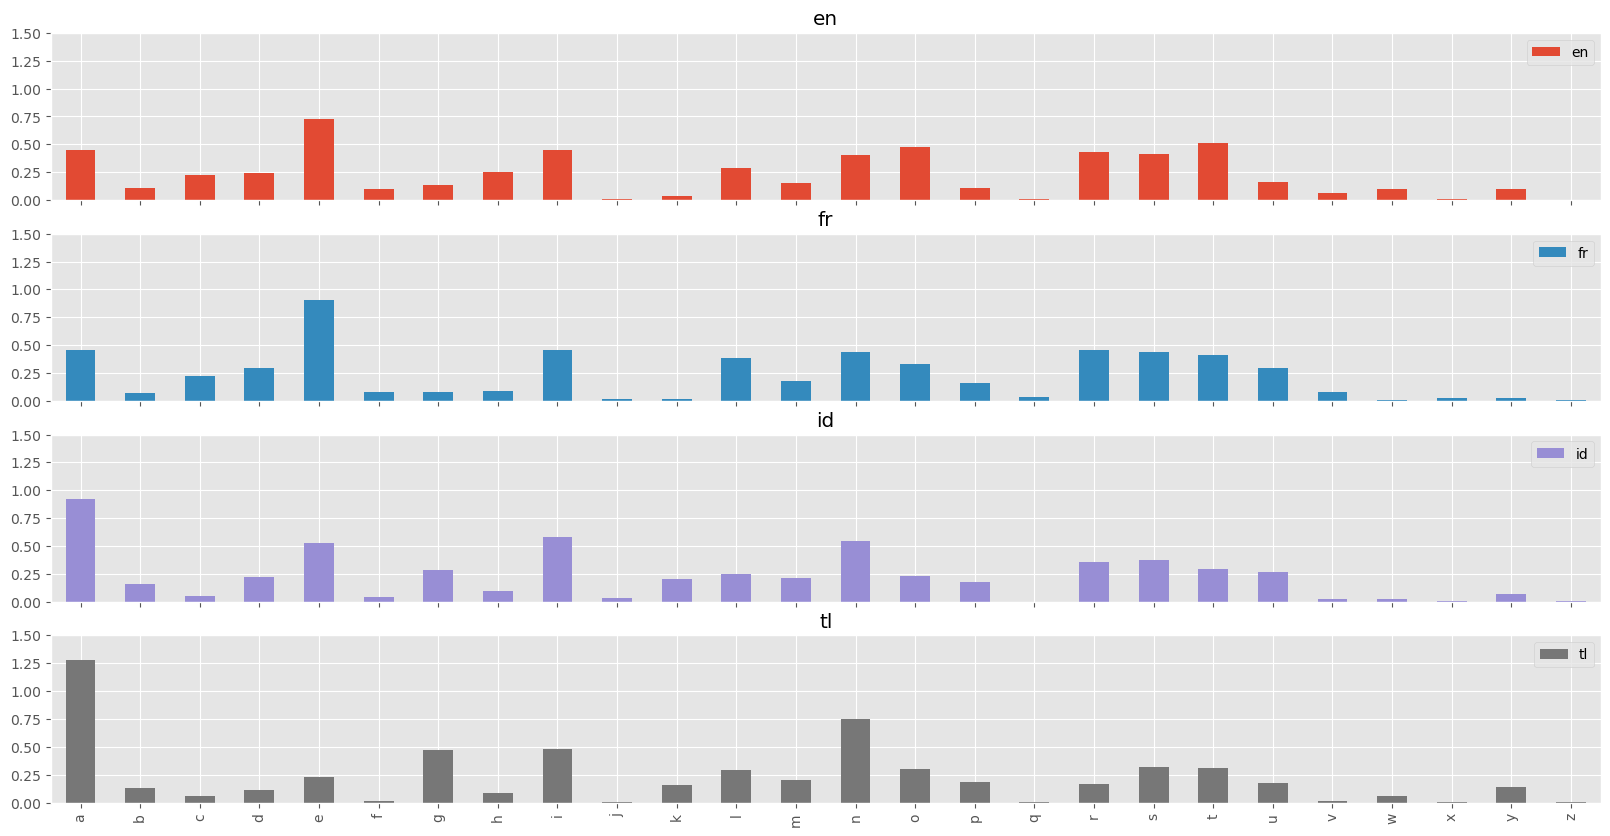

In [38]:
# 막대 그래프 그리기
plt.style.use('ggplot')
df.plot(
    kind='bar',
    subplots=True,
    figsize=(20, 10),
    ylim = (0,1.5)
)
plt.show()

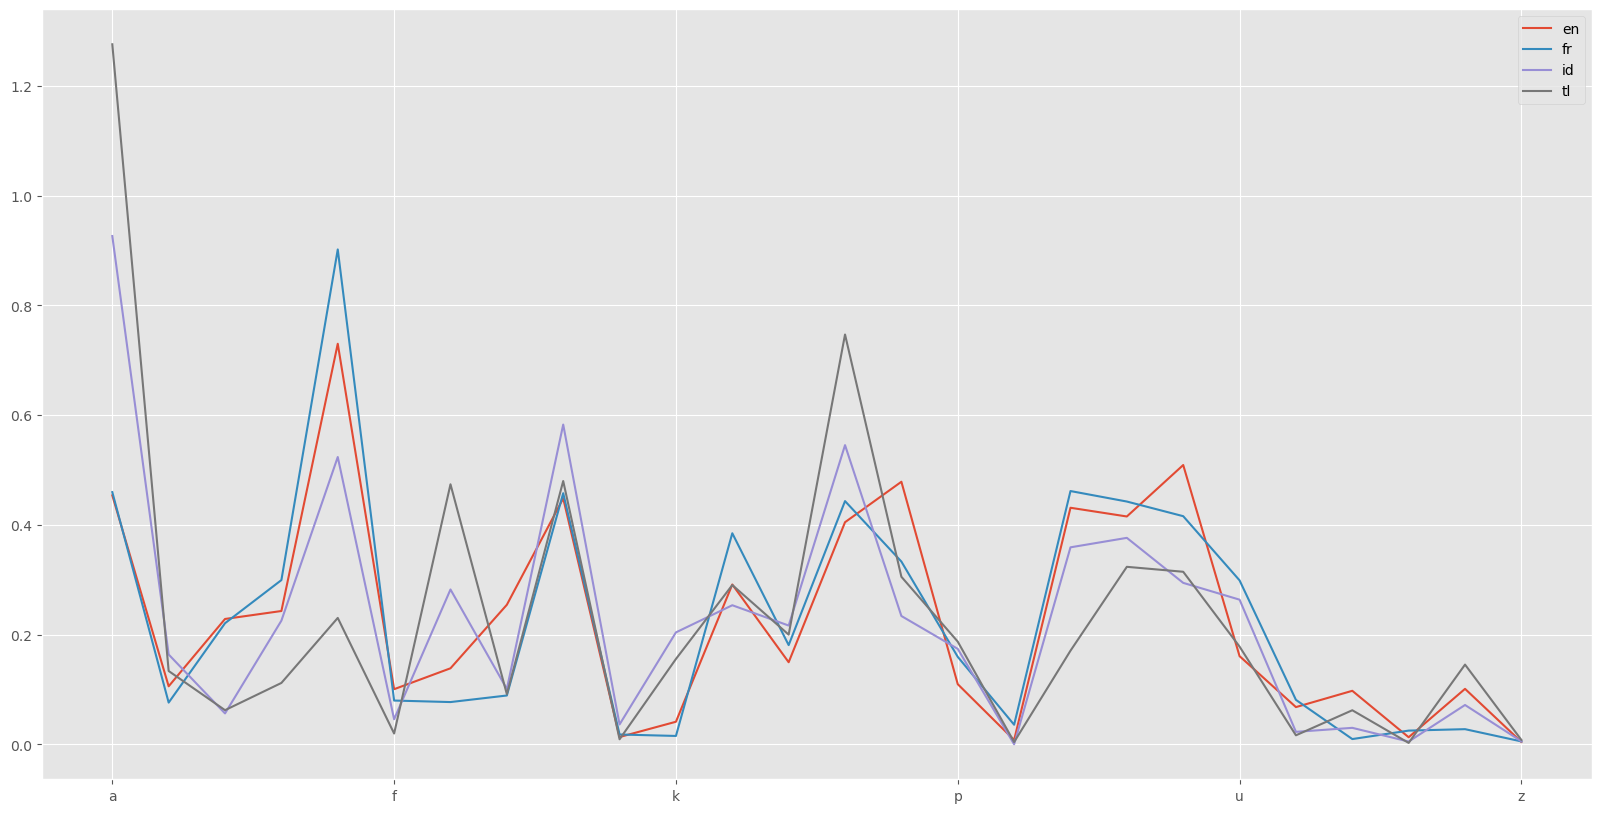

In [39]:
# 선그래프
plt.style.use('ggplot')
df.plot(
    kind='line',
    figsize=(20, 10)
)
plt.show()

---
#### 구분된 선그래프로 언어별 특성 비교하기

In [40]:
import koreanize_matplotlib

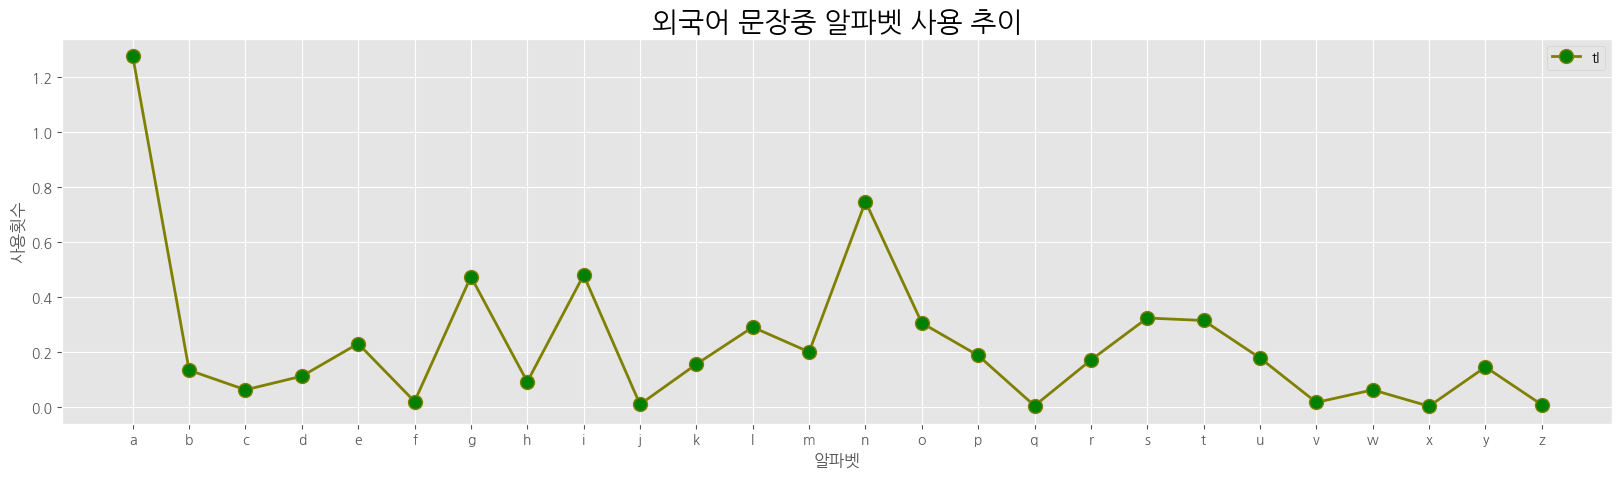

In [43]:
# 스타일 서식
plt.style.use('ggplot')

# 그래프 객체 생성(figure에 1개의 서브플롯을 생성)
fig = plt.figure(figsize=(20, 5))
ax = fig.add_subplot(1, 1, 1)

# tl
ax.plot(
    df.index,
    df.loc[:,'tl'],
    marker='o',
    markerfacecolor='green',
    markersize=10,
    color='olive',
    linewidth=2,
    label='tl'
)

# 범례 표시
ax.legend(loc='best')

# 차트 제목
ax.set_title('외국어 문장중 알파벳 사용 추이', size=20)

# 축이름
ax.set_xlabel('알파벳', size=12)
ax.set_ylabel('사용횟수', size=12)

plt.show()